In [1]:
import h5py
import os
import re
import numpy as np
from math import sqrt, log10
from matplotlib import pyplot as plt

# load data

In [8]:
data_root = "/home/nju-student/mkh/datasets/radar/MTD_Results"

def read_matlab_v73_file(label, batch, frame):
    file_path = os.path.join(data_root, f"Label_{label}/Batch_{batch}/Frame_{frame}/MTD_result.mat")
    with h5py.File(file_path, 'r') as f:
        var_names = list(f.keys())
        data = {}

        for var_name in var_names:
            # HDF5 中的数据是按列优先存储的，而 NumPy 是按行优先，因此需要转置
            if isinstance(f[var_name], h5py.Dataset):
                data[var_name] = np.array(f[var_name]).T

        return data

# visualize

In [9]:
def check_path(path):
    path = os.path.dirname(path)
    if not os.path.exists(path):
        os.makedirs(path)


def split_scientific_str(num, precision=10):
    """使用字符串格式化将一个数分成科学计数法的尾数和指数两部分"""
    scientific_str = f"{num:.{precision}e}"
    match = re.match(r'([+-]?\d+\.\d+)e([+-]?\d+)', scientific_str)
    if match:
        mantissa = float(match.group(1))
        exponent = int(match.group(2))
        return mantissa, exponent
    return num, 0


def visualize_rd_matrix(data, save_path=None, eps=1e-6, verbose=False):
    """可视化 RD 矩阵"""
    rd_matrix = data['rd_matrix']
    value = np.zeros_like(rd_matrix, dtype=np.float64)
    for i in range(len(rd_matrix)):
        for j in range(len(rd_matrix[i])):
            real = rd_matrix[i][j][0]
            real_mantissa, real_exponent = split_scientific_str(real)
            imag = rd_matrix[i][j][1]
            imag_mantissa, imag_exponent = split_scientific_str(imag)
            if real_exponent > imag_exponent:
                real_mantissa *= 10 ** (real_exponent - imag_exponent)
                value[i][j] = 10 * (log10(real_mantissa ** 2 + imag_mantissa ** 2 + eps) +  2 * imag_exponent)
            elif real_exponent < imag_exponent:
                imag_mantissa *= 10 ** (imag_exponent - real_exponent)
                value[i][j] = 20 * (log10(sqrt(real_mantissa ** 2 + imag_mantissa ** 2 + eps)) + real_exponent)
            else:
                value[i][j] = 20 * (log10(sqrt(real_mantissa ** 2 + imag_mantissa ** 2 + eps)) + real_exponent)

    range_axis = data['range_axis']
    velocity_axis = data['velocity_axis']

    if verbose:
        print(f"RD矩阵形状: {rd_matrix.shape}")
        print(f"距离轴长度: {len(range_axis)}")
        print(f"速度轴长度: {len(velocity_axis)}")

    plt.figure(figsize=(10, 8))

    X, Y = np.meshgrid(velocity_axis, range_axis)
    plt.pcolormesh(X, Y, value, shading='auto', cmap='jet')
    plt.xlim(-30, 30)
    plt.colorbar(label='Amplitude (dB)')
    plt.xlabel('velocity (m/s)')
    plt.ylabel('range (m)')
    plt.title('RD Map')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    if save_path:
        check_path(save_path)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()
    else:
        plt.show()

RD矩阵形状: (31, 226)
距离轴长度: 1
速度轴长度: 1


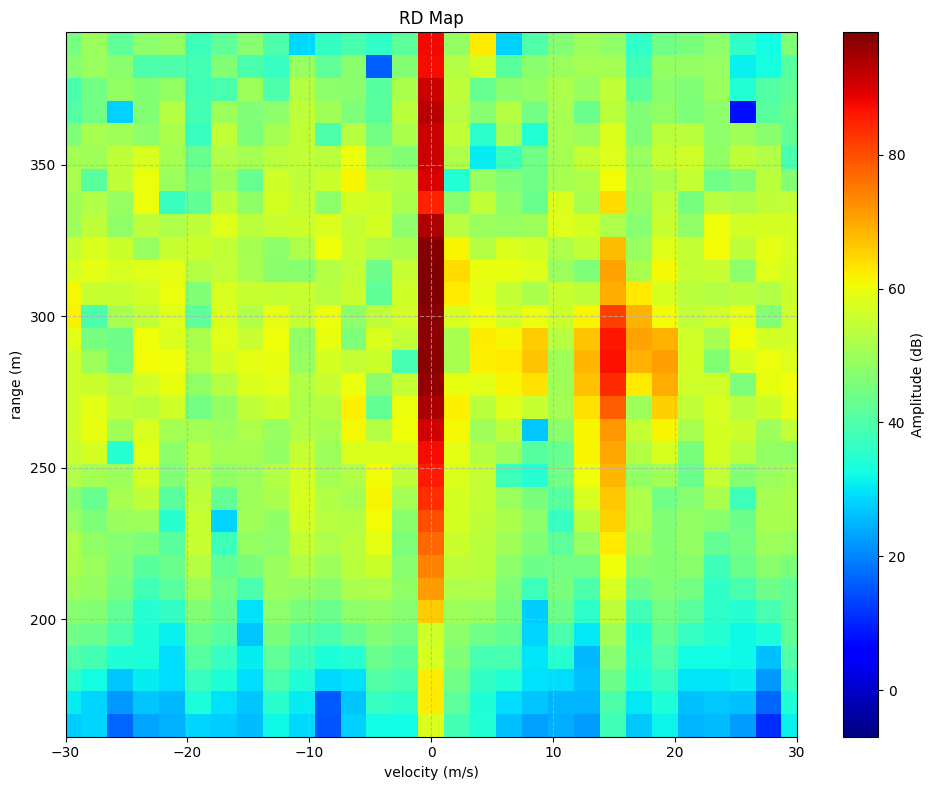

In [10]:
label = 1
batch = 1
frame = 1

data = read_matlab_v73_file(label, batch, frame)
visualize_rd_matrix(data, verbose=True)

# 批量处理

In [11]:
import glob

ModuleNotFoundError: No module named 'utils'

In [25]:
data_root = "E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results"
label_dirs = glob.glob(f"{data_root}/Label_*")
image_sizes = []
for label_dir in label_dirs:
    batch_dirs = glob.glob(f"{label_dir}/Batch_*")
    for batch_dir in batch_dirs:
        frame_dirs = glob.glob(f"{batch_dir}/Frame_*")
        for frame_dir in frame_dirs:
            data = read_matlab_v73_file(label, batch, frame)
            rd_matrix = data['rd_matrix']
            velocity_axis = data['velocity_axis']
            velocity_mask = np.reshape(np.abs(velocity_axis) < 56, -1)
            rd_matrix = rd_matrix[:, velocity_mask]
            image_size = rd_matrix.shape
            if image_size not in image_sizes:
                image_sizes.append(image_size)
print(image_sizes)

[(31, 53), (31, 65), (31, 201), (31, 217), (31, 503), (31, 545), (31, 319), (31, 345), (31, 47), (31, 141), (31, 127)]


In [ ]:
for label_dir in label_dirs:
    batch_dirs = glob.glob(f"{label_dir}/Batch_*")
    for batch_dir in batch_dirs:
        frame_dirs = glob.glob(f"{batch_dir}/Frame_*")
        for frame_dir in frame_dirs:
            data = read_matlab_v73_file(label, batch, frame)
            rd_matrix = data['rd_matrix']
            velocity_axis = data['velocity_axis']
            velocity_mask = np.reshape(np.abs(velocity_axis) < 56, -1)
            rd_matrix = rd_matrix[:, velocity_mask]
            image_size = rd_matrix.shape
            if image_size == (31, 545):
                print(frame_dir)

E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_104\Frame_90
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_104\Frame_92
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_105\Frame_108
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_108\Frame_2
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_108\Frame_4
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_108\Frame_6
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_109\Frame_18
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_109\Frame_26
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_109\Frame_30
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_109\Frame_34
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_109\Frame_40
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_109\Frame_44
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_109\Frame_46
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_109\Fra

In [14]:
data_root = "E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results"
label_dirs = glob.glob(f"{data_root}/Label_*")
max_velocity = 0
for label_dir in label_dirs:
    batch_dirs = glob.glob(f"{label_dir}/Batch_*")
    for batch_dir in batch_dirs:
        frame_dirs = glob.glob(f"{batch_dir}/Frame_*")
        for frame_dir in frame_dirs:
            data = read_matlab_v73_file(label, batch, frame)
            velocity = abs(data["velocity"][0][0])
            if velocity > 30:
                print(frame_dir)
            max_velocity = max(max_velocity, velocity)
print(max_velocity)

E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_111\Frame_53
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_111\Frame_54
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_111\Frame_55
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_111\Frame_56
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_111\Frame_57
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_111\Frame_58
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_111\Frame_59
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_111\Frame_60
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_121\Frame_57
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_121\Frame_58
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_166\Frame_60
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_166\Frame_61
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_208\Frame_1
E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results\Label_1\Batch_208\Fr

In [11]:
label = 1
batch = 1
frame = 1
file_path = f"E:/DataSets/挑战杯_揭榜挂帅_CQ-08赛题_数据集/MTD_Results/Label_{label}/Batch_{batch}/Frame_{frame}/MTD_result.mat"
with h5py.File(file_path, 'r') as f:
    var_names = list(f.keys())
    data = {}

    for var_name in var_names:
        # HDF5 中的数据是按列优先存储的，而 NumPy 是按行优先，因此需要转置
        if isinstance(f[var_name], h5py.Dataset):
            data[var_name] = np.array(f[var_name]).T

In [14]:
rd_matrix = data["rd_matrix"]
value = np.zeros_like(rd_matrix, dtype=np.float64)
eps = 1e-10
for i in range(len(rd_matrix)):
    for j in range(len(rd_matrix[i])):
        real = rd_matrix[i][j][0]
        real_mantissa, real_exponent = split_scientific_str(real)
        imag = rd_matrix[i][j][1]
        imag_mantissa, imag_exponent = split_scientific_str(imag)
        if real_exponent > imag_exponent:
            real_mantissa *= 10 ** (real_exponent - imag_exponent)
            value[i][j] = 10 * (log10(real_mantissa ** 2 + imag_mantissa ** 2 + eps) +  2 * imag_exponent)
        elif real_exponent < imag_exponent:
            imag_mantissa *= 10 ** (imag_exponent - real_exponent)
            value[i][j] = 20 * (log10(sqrt(real_mantissa ** 2 + imag_mantissa ** 2 + eps)) + real_exponent)
        else:
            value[i][j] = 20 * (log10(sqrt(real_mantissa ** 2 + imag_mantissa ** 2 + eps)) + real_exponent)
velocity = data["velocity_axis"]
range_axis = data["range_axis"]

In [21]:
velocity_mask = np.abs(velocity) < 30
velocity_mask = np.reshape(velocity_mask, -1)

In [22]:
value_mask = value[:, velocity_mask]